In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt,pi,exp

In [2]:
Datos = pd.read_excel(r'C:\Users\pc\Desktop\COVID19MEXICO.xlsx')
Datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-07,181b6b,1,4,5,2,5,5,35,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97
1,2020-05-07,06f865,1,4,5,2,5,5,18,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
2,2020-05-07,0f39c1,1,4,24,1,25,24,28,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-07,1070bf,1,4,15,1,15,15,99,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-07,19400000,1,4,15,2,21,15,120,2,...,2,2,2,2,99,2,99,MÃ©xico,99,2


In [5]:
tabla=Datos[['TIPO_PACIENTE','EDAD','SEXO','ENTIDAD_RES','RESULTADO']]
tabla.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO
0,1,26,2,5,1
1,2,47,2,5,1
2,1,48,1,24,1
3,2,51,1,15,1
4,2,61,2,15,2


In [6]:
pos=tabla[(tabla.RESULTADO==1)]

In [7]:
colima=pos [(pos.ENTIDAD_RES==6)]
len(colima)

35

In [8]:
chiapas=pos [(pos.ENTIDAD_RES==7)]
len(chiapas)

291

In [9]:
durango=pos [(pos.ENTIDAD_RES==10)]
len(durango)

97

In [10]:
guerrero=pos [(pos.ENTIDAD_RES==12)]
len(guerrero)

441

In [11]:
hidalgo=pos [(pos.ENTIDAD_RES==13)]
len(hidalgo)

431

In [12]:
jalisco=pos [(pos.ENTIDAD_RES==14)]
len(jalisco)

508

In [13]:
campeche=pos [(pos.ENTIDAD_RES==4)]
len(campeche)

157

In [14]:
nayarit=pos [(pos.ENTIDAD_RES==18)]
len(nayarit)

179

In [15]:
oaxaca=pos [(pos.ENTIDAD_RES==20)]
len(oaxaca)

212

In [16]:
zacatecas=pos [(pos.ENTIDAD_RES==32)]
len(zacatecas)

128

In [17]:
Tab1=list(colima.EDAD)
a,b= min(Tab1), max(Tab1)
n=len(Tab1)

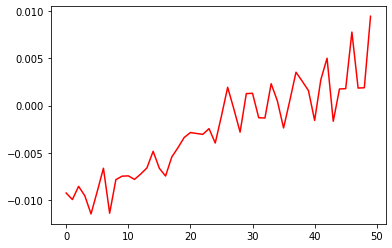

In [18]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab1 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab1 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [19]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab1 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab1 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

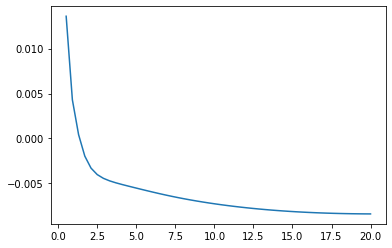

In [20]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab1[i]-Tab1[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

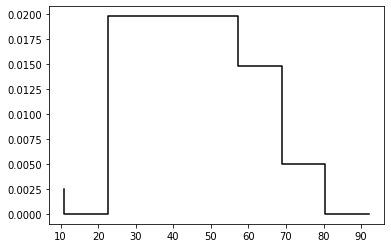

In [21]:
Histograma(7)

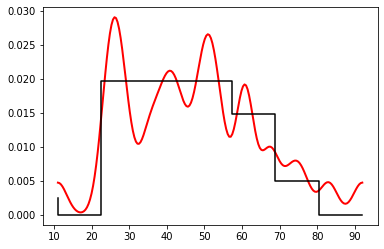

In [22]:
h = 2.4
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab1[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(7)

In [23]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [24]:
@interact(h=widgets.FloatSlider(
    value=2.4,
    min=0,
    max=8,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Suavizamiento(h):
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab1[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(FloatSlider(value=2.4, continuous_update=False, description='h:', max=8.0, readout_forma…

In [25]:
@interact(m=widgets.IntSlider(
    value=7,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=2.4,
    min=0,
    max=8,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab1 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab1 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab1[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=7, continuous_update=False, description='m:', max=200, min=5), FloatSlid…

## Estado de Chiapas

In [26]:
Tab2=list(chiapas.EDAD)
a,b= min(Tab2), max(Tab2)
n=len(Tab2)

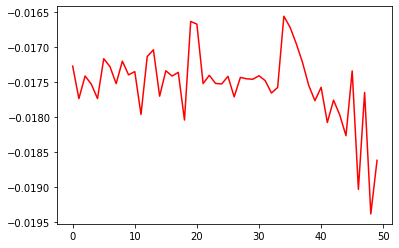

In [27]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab2 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab2 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [28]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab2 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab2 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

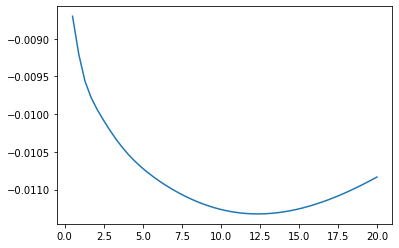

In [29]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab2[i]-Tab2[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

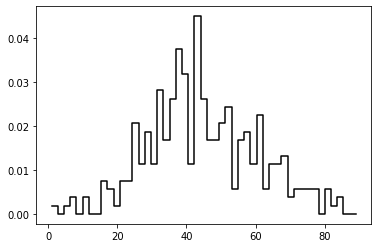

In [30]:
Histograma(48)

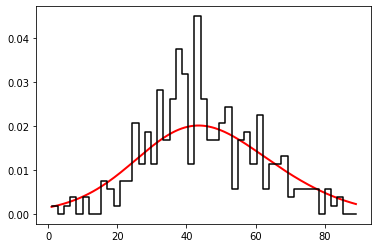

In [31]:
h = 12.5
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab2[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(48)

In [33]:
@interact(m=widgets.IntSlider(
    value=48,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=12.5,
    min=0,
    max=15,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab2 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab2 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab2[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=48, continuous_update=False, description='m:', max=200, min=5), FloatSli…

## Estado de Durango

In [34]:
Tab3=list(durango.EDAD)
a,b= min(Tab3), max(Tab3)
n=len(Tab3)

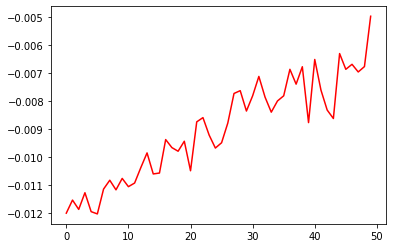

In [35]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab3 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab3 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [36]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab3 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab3 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

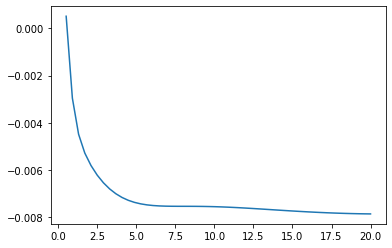

In [37]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab3[i]-Tab3[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

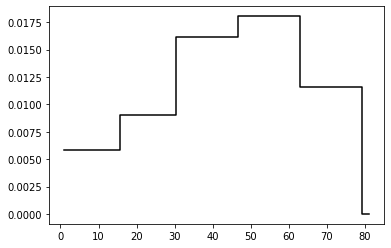

In [38]:
Histograma(5)

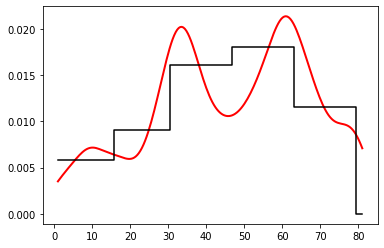

In [39]:
h = 3.8
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab3[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(5)

In [40]:
@interact(m=widgets.IntSlider(
    value=5,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=3.8,
    min=0,
    max=8,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab3 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab3 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab3[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=5, continuous_update=False, description='m:', max=200, min=5), FloatSlid…

## Estado de Guerrero

In [41]:
Tab4=list(guerrero.EDAD)
a,b= min(Tab4), max(Tab4)
n=len(Tab4)

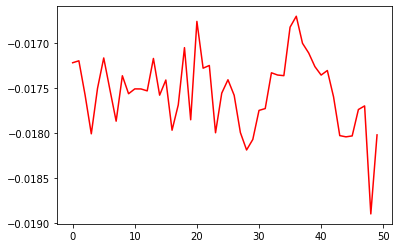

In [42]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab4 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab4 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [43]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab4 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab4 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

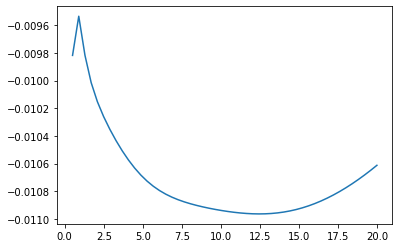

In [45]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab4[i]-Tab4[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

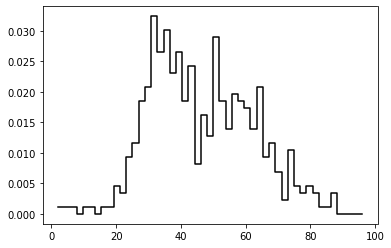

In [46]:
Histograma(48)

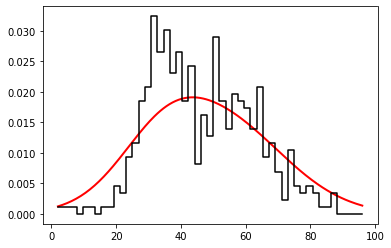

In [47]:
h = 12.5
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab4[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(48)

In [48]:
@interact(m=widgets.IntSlider(
    value=48,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=12.5,
    min=0,
    max=20,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab4 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab4 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab4[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=48, continuous_update=False, description='m:', max=200, min=5), FloatSli…

## Estado de Hidalgo

In [49]:
Tab5=list(hidalgo.EDAD)
a,b= min(Tab5), max(Tab5)
n=len(Tab5)

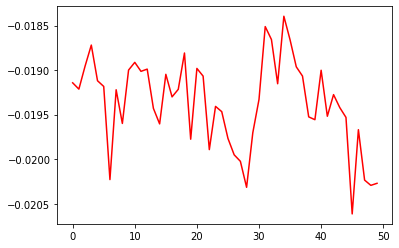

In [50]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab5 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab5 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [51]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab5 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab5 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

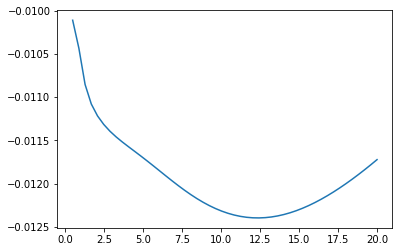

In [52]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab5[i]-Tab5[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

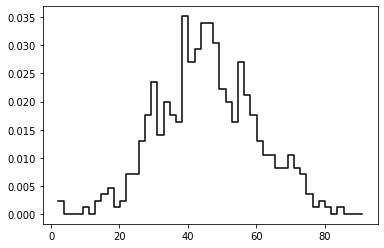

In [53]:
Histograma(45)

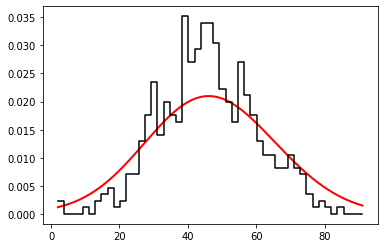

In [54]:
h = 12.5
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab5[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(45)

In [55]:
@interact(m=widgets.IntSlider(
    value=45,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=12.5,
    min=0,
    max=20,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab5 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab5 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab5[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=45, continuous_update=False, description='m:', max=200, min=5), FloatSli…

## Estado de Jalisco

In [56]:
Tab6=list(jalisco.EDAD)
a,b= min(Tab6), max(Tab6)
n=len(Tab6)

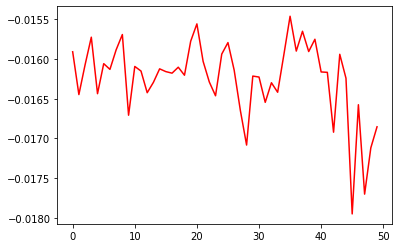

In [57]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab6 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab6 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [58]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab6 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab6 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

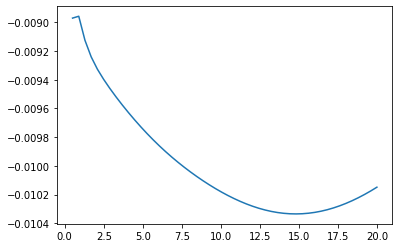

In [59]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab6[i]-Tab6[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

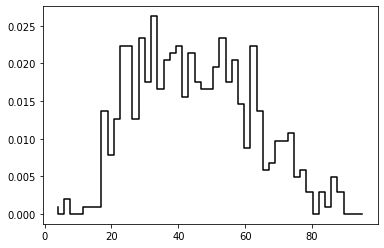

In [60]:
Histograma(45)

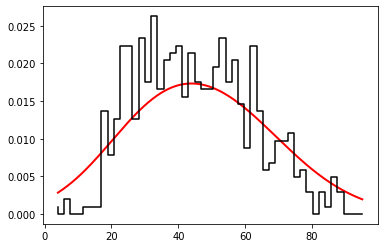

In [61]:
h = 14.8
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab6[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(45)

In [62]:
@interact(m=widgets.IntSlider(
    value=45,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=14.8,
    min=0,
    max=25,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab6 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab6 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab6[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=45, continuous_update=False, description='m:', max=200, min=5), FloatSli…

## Estado de Campeche

In [63]:
Tab7=list(campeche.EDAD)
a,b= min(Tab7), max(Tab7)
n=len(Tab7)

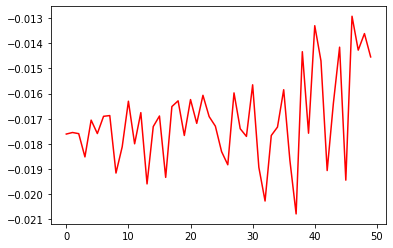

In [64]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab7 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab7 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [65]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab7 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab7 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

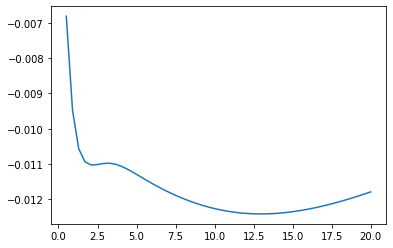

In [66]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab7[i]-Tab7[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

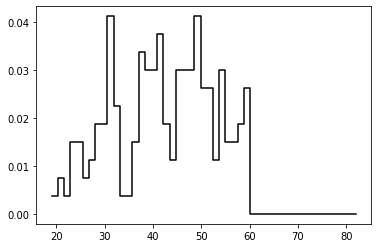

In [67]:
Histograma(37)

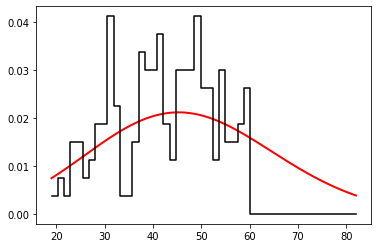

In [68]:
h = 12.5
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab7[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(37)

In [69]:
@interact(m=widgets.IntSlider(
    value=37,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=12.5,
    min=0,
    max=25,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab7 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab7 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab7[i])/h) for i in range(n)]) 
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=37, continuous_update=False, description='m:', max=200, min=5), FloatSli…

## Estado de Nayarit

In [70]:
Tab8=list(nayarit.EDAD)
a,b= min(Tab8), max(Tab8)
n=len(Tab8)

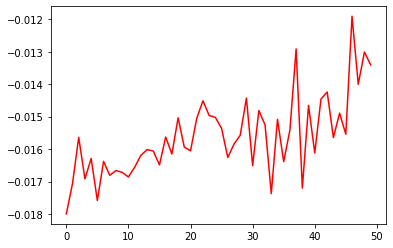

In [71]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab8 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab8 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [72]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab8 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab8 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

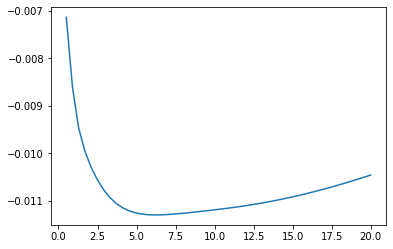

In [73]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab8[i]-Tab8[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

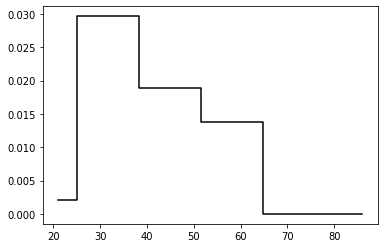

In [74]:
Histograma(5)

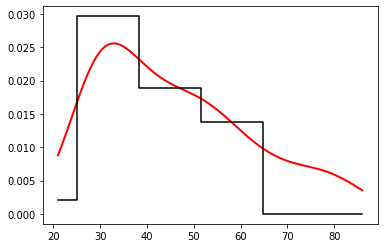

In [75]:
h = 5.8
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab8[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(5)

In [76]:
@interact(m=widgets.IntSlider(
    value=5,
    min=3,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=5.8,
    min=0,
    max=8,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab8 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab8 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab8[i])/h) for i in range(n)])
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=5, continuous_update=False, description='m:', max=200, min=3), FloatSlid…

## Estado de Oaxaca

In [77]:
Tab9=list(oaxaca.EDAD)
a,b= min(Tab9), max(Tab9)
n=len(Tab9)

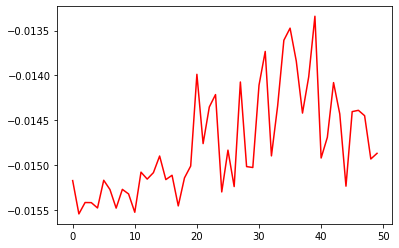

In [78]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab9 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab9 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [79]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab9 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab9 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

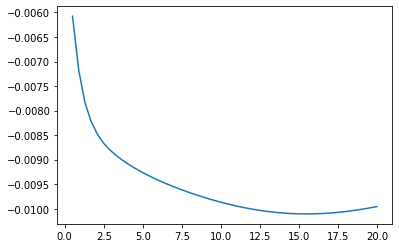

In [80]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab9[i]-Tab9[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

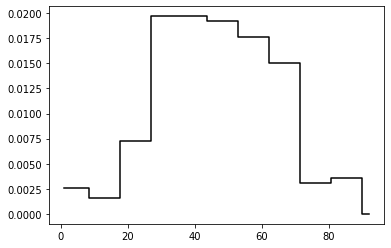

In [81]:
Histograma(10)

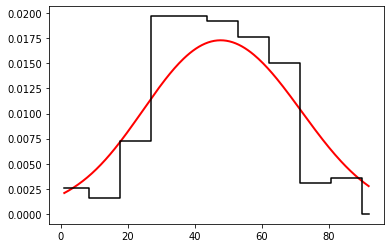

In [82]:
h = 15.0
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab9[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(10)

In [83]:
@interact(m=widgets.IntSlider(
    value=10,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=15.0,
    min=0,
    max=30,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab9 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab9 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab9[i])/h) for i in range(n)])
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=10, continuous_update=False, description='m:', max=200, min=5), FloatSli…

## Estado de Zacatecas

In [84]:
Tab10=list(zacatecas.EDAD)
a,b= min(Tab10), max(Tab10)
n=len(Tab10)

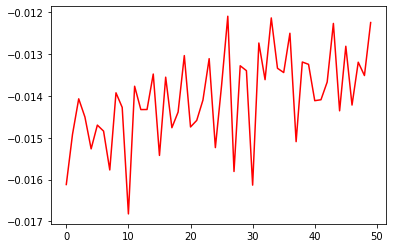

In [85]:
def Error(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab10 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab10 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    J = 2/(h*(n-1))-(n+1)/(h*(n-1))*sum([p[j]**2 for j in range(m)])
    return(J)
plt.plot([Error(m) for m in range(10,60)],color='r')

In [86]:
def Histograma(m):
    h = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab10 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab10 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/h*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')

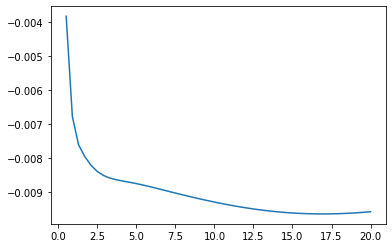

In [87]:
K = lambda x: 1/sqrt(2*pi)*exp(-x**2/2)
K_star = lambda x: 1/sqrt(2*pi)*exp(-x**2/(2*2)) - 2*K(x)
J = lambda h: 1/(h*n**2)*sum([sum([K_star((Tab10[i]-Tab10[j])/h) for i in range(n)]) for j in range(n)])+2/(n*h)*K(0)
plt.plot(np.linspace(0.5,20),[J(h) for h in np.linspace(0.5,20)])

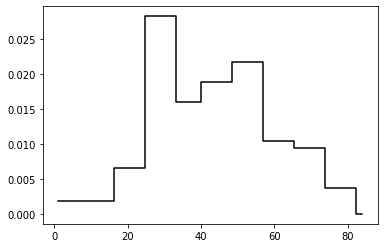

In [88]:
Histograma(10)

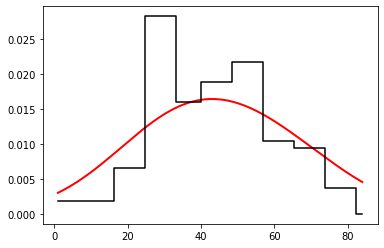

In [89]:
h = 16.0
fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab10[i])/h) for i in range(n)])
plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)
Histograma(10)

In [90]:
@interact(m=widgets.IntSlider(
    value=10,
    min=5,
    max=200,
    step=1,
    description='m:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
),h=widgets.FloatSlider(
    value=16.0,
    min=0,
    max=30,
    step=0.1,
    description='h:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
))
def Histograma(m,h):
    H = (b-a)/m
    Y=[]
    p = []
    for j in range(m):
        Y.append(len([x for x in Tab10 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m]))
        p.append(len([x for x in Tab10 if x>=j*(b-a)/m and x<(j+1)*(b-a)/m])/n)
    fn = lambda x: sum([p[j]/H*(x>=j*(b-a)/m and x<(j+1)*(b-a)/m) for j in range(m)])
    plt.step(np.linspace(a,b),[fn(x) for x in np.linspace(a,b)],color='black')
    fn = lambda x:(1/n)*sum([(1/h)*K((x-Tab10[i])/h) for i in range(n)])
    plt.plot(np.linspace(a,b,200),[fn(x) for x in np.linspace(a,b,200)],color='red',lw=2)

interactive(children=(IntSlider(value=10, continuous_update=False, description='m:', max=200, min=5), FloatSli…